In [1]:
#Imports
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openweathermapy.core as ow
from citipy import citipy 
import random
import requests as req
import urllib
from time import sleep
import seaborn as sns
import time

In [4]:
city_data_df = pd.read_csv("city_weather_data_complete.csv")

print(city_data_df["coord.lat"].max())
print(city_data_df["coord.lat"].min())
print(city_data_df["main.temp_max"].max())
print(city_data_df["main.temp_max"].min())


78.22
-54.81
105.8
-17.68


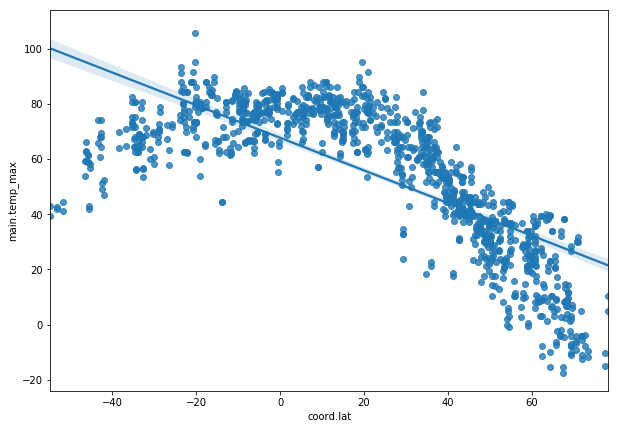

In [18]:
plt.rcParams["figure.figsize"] = (10, 7)
sns.regplot( x=city_data_df["coord.lat"],y=city_data_df["main.temp_max"])
plt.xlim(city_data_df["coord.lat"].min(),city_data_df["coord.lat"].max())
plt.savefig("lat_vs_maxtemp")
plt.show()

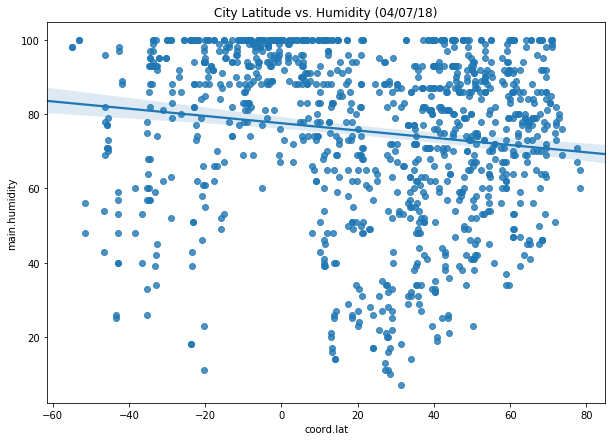

In [20]:
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
sns.regplot( x="coord.lat",y="main.humidity", data =city_data_df)
plt.savefig("lat_vs_humidity")
plt.show()

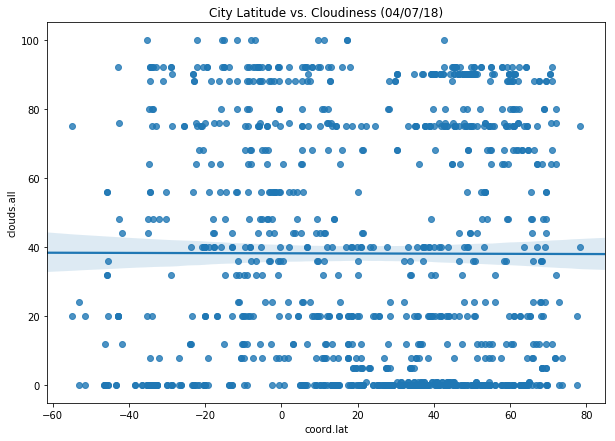

In [21]:
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
sns.regplot( x="coord.lat",y="clouds.all", data =city_data_df)
plt.savefig("lat_vs_clouds")
plt.show()

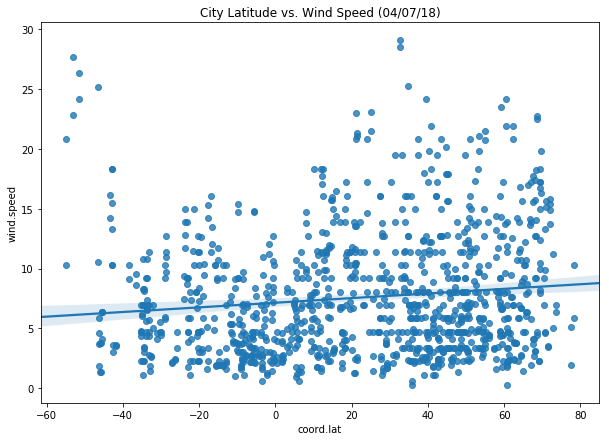

In [22]:
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
sns.regplot( x="coord.lat", y="wind.speed", data =city_data_df)
plt.savefig("lat_vs_windspeed")
plt.show()

In [63]:
city_data_df.head()


,Unnamed: 0,name,sys.country,coord.lat,coord.lon,main.temp_max,main.humidity,wind.speed,clouds.all
0,0,Nastola,FI,60.95,25.93,21.20,92,4.70,75
1,1,Chuy,UY,-33.69,-53.46,66.71,93,9.17,0
2,2,Fukue,JP,35.03,136.69,57.20,67,6.93,0
3,3,Rikitea,PF,-23.12,-134.97,79.81,100,8.72,56
4,4,Bredasdorp,ZA,-34.53,20.04,64.40,82,3.36,56


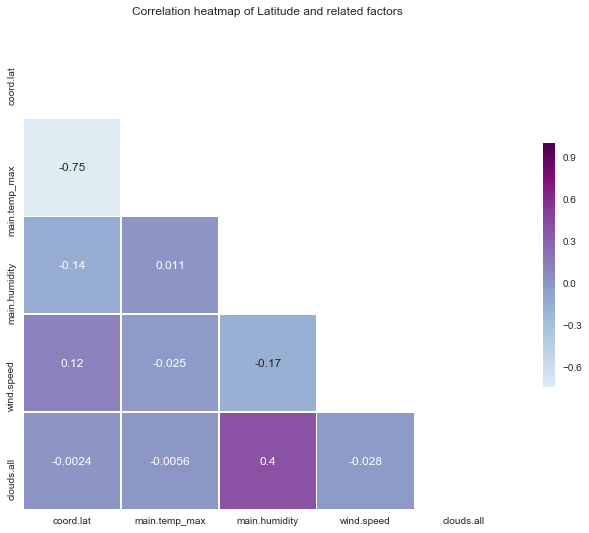

In [158]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix

corr = city_data_df[['name', 'sys.country', 'coord.lat', 'main.temp_max', 'main.humidity', 'wind.speed', 'clouds.all']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
plt.title("Correlation heatmap of Latitude and related factors")
sns.heatmap(corr, mask=mask, cmap='BuPu', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)